# <center> Predicting the price of a vehicle. Automotive Industry</center>

# Introduction
The goal of this project is to explore an automobile dataset and to predict a price of a vehicle by its various characteristics using different supervised regression machine learning algorithms. 

Big Picture: the motivation of the project is to potentially faster assess various vehicles, which can potentially reduce labour costs/work-hours for actuaries.

A performance measure that will be used is RMSE (it has a higher weight for large errors).

## Dataset
The dataset provides various specifications of a vehicle:
1) its charasteristics (engine-type, manufacturer, number of doors etc.) 
2) its insurane rating (symboling), how a vehicle is risker compare to its price. 
3) its normalized loses in use compare to other cars 
4) actual price

(from 1985 Ward's Automotive Yearbook [Link](https://www.kaggle.com/datasets/toramky/automobile-dataset?select=Automobile_data.csv)).
Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037


## Outline
The overarching goal is to predict a vehicle's price. The outline of the project is as follow:
1) an exploratory data analysis will be performed to understand different connections in the dataset. 
2) clean the data/prepare it. perfrom feature selections/extractions to prepare it for different machine learning algorithms
3) train various regression algorithms:
* Linear Regression
* regularized Linear Regression (Ridge Regression, Lasso, Elastic Net)
* Support Vector Machine Regression
* Decision Trees
* Random Forests, various boosting and stacking techniques
4) perform cross-validation and tune the hyperparameters to achieve the best accuracy with GridSearchCV
5) prepare it and use on the test set.
6) export as pkl to prepare for a deployment

# Initial exploration

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading & Analyzing the dataset

In [96]:
data=pd.read_csv('Automobile_data.csv')

In [97]:
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

"normalized loss" is supposed to be numeric type, by looking at the dataset: some values are marked as "?". The dtype of horsepower, peak-rpm and price is object, so there are some missing vales "?" too, I fill them with Nan for now. (we will later incorporate it in the Transormation Pipeline, but for now I just wanted to get a glimpse of the data)

In [108]:
#replace ? with Nan
data.replace('?', np.nan,inplace=True)
#change the data types:
numeric_attrib= ["normalized-losses","stroke", 'bore','horsepower',"peak-rpm","price"]
data[numeric_attrib]=data[numeric_attrib].apply(pd.to_numeric)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Lets visualise the data:

In [110]:
corr_matrix=data.corr()

In [111]:
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.810533
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543436
normalized-losses    0.203254
height               0.135486
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

it is apparent that the price is highly correlated with the size of the vehicle (width, height, engine-size), horsepower. The normalized-loss seems not to be a huge factor in predicting the price, contrary to the expected negative correlation. The mpg and the price seem to be reversly correlated. 

An mpg (miles per gallon) is a metric of fuel efficiency. So, it does not make sense, why more efficient cars in this dataset are cheaper. It may be the case that the dataset is not really represented by very efficient cars. Thus, for example a "larger" vehicle with higher mpg will cost more than a smaller one with higher mpg, only because in this dataset e.g. size plays a more important role.

Let's plot the matrix.

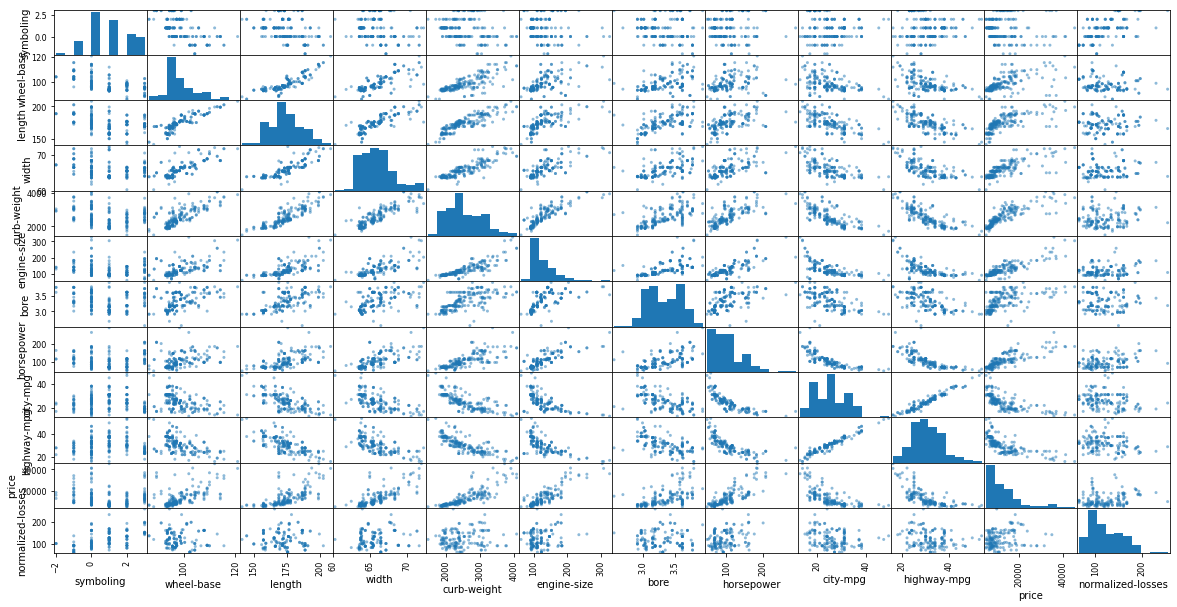

In [127]:
from pandas.plotting import scatter_matrix
attribut=[ 'symboling', 'wheel-base', 'length', 'width',
        'curb-weight', 'engine-size', 'bore', 'horsepower',  'city-mpg',
       'highway-mpg', 'price',"normalized-losses"]
scatter_matrix(data[attribut], figsize=(20,10));

most of the cars are in range <20000 $. The mpg plays for this segment a negatively correlated factor, the customer seems to care much more about the horsepower and enginze-size, than the mpg. It is true only for this particular segment. So, it is not talked about the generalization for the whole automotive industry. 

The symboling feature had a low coefficient in the Pearson matrix. But as we can see now, it does not make it a bad feature. We can see that, the 0 values (not risky vehicles) are more expensive. So, it is also a good feature.

The normalized-losses is also an interesting one, and it has an interesting correlation: low-maintenace cars cost cheap, but as the cost for maintenance increases, so does the price, until it peaks (around 100), and the decreases. The cheapest cars have either very low-maintenace or very high.

Now it is clear what numerical features should be used for the model training:
symboling, normalized-loss, engine-size, curb-weight, horsepower,width , length , wheel-base, bore, city-mpg, highway-mpg. 

The selected features have good high correlations to price. To test one another feature lets try the area a car has over the horsepower: $$\frac{length*width}{horsepower}$$.

In [136]:
data["l*w/hp"]=data["length"]*data["width"]/data["horsepower"]
data.corr()["price"]

symboling           -0.082391
normalized-losses    0.203254
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543436
stroke               0.082310
compression-ratio    0.071107
horsepower           0.810533
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
l*w/hp              -0.642337
Name: price, dtype: float64

as expected, it has a highly negative correlation.

Let's recap. So far we have replaced "?" with Nan, looked on correlations between different features, and picked the ones we want to use later.

I have not yet divieded the data into training and testing, since I wanted to change the ? values to Nan. The absolutely right way would be just to add this change to the data pipeline. But I wanted to go through each change step by step. And that is why, only now we split the data into training and testing, and forget the test set not to get the snooping bias.

In [137]:
from sklearn.model_selection import train_test_split
data_train, data_test=train_test_split(data,test_size=0.2, random_state=42)

## Cleaning the dataset


### Numerical values

In [142]:
#check the number of missing values
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
l*w/hp                2
dtype: int64

41 data points are missing, it is 20% of the data. it is quite a lot. let's see, maybe they correspond to the same manufacturer:

In [156]:
np.isnan(data["normalized-losses"][0])

True

In [157]:
data.loc[np.isnan(data['normalized-losses'])].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,l*w/hp
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,97.478198
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,97.478198
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,72.815584
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,106.863545
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,125.079818
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,75.623625
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0,104.496694
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0,69.473077
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0,72.302308
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0,76.743407


it seems not to be the case. there are 2 ways to deal with it: either drop all the instances with missing values or fill them with the median.
my solution for now would be just to fill them with the median of the whole column. Another solution with the median would be: 
* to fill the values that correspond to a similiar vehicle

In [158]:
### add missing values through the median to the numerical values:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
data_numerical=data[["normalized-losses","stroke", 'bore','horsepower',"peak-rpm","price","l*w/hp"]]

In [159]:
imputer.fit(data_numerical)

#all the median values: 
imputer.statistics_

array([1.15000000e+02, 3.29000000e+00, 3.31000000e+00, 9.50000000e+01,
       5.20000000e+03, 1.02950000e+04, 1.25079818e+02])

In [223]:
#now fill it back to the dataframe:
#data[["normalized-losses","stroke", 'bore','horsepower',"peak-rpm","price","l*w/hp"]]=imputer.transform(data_numerical)

In [161]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,l*w/hp
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329366,3.256098,10.142537,104.165854,5126.097561,25.219512,30.751220,13150.307317,121.476988
std,1.245307,31.805105,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270858,0.313634,3.972040,39.529733,477.035772,6.542142,6.886443,7879.121326,32.403458
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,44.108021
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,98.277000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,125.079818
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,147.584412
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,216.275962


In [220]:
data_num

array([[1.15000000e+02, 2.68000000e+00, 3.47000000e+00, ...,
        5.00000000e+03, 1.34950000e+04, 9.74781982e+01],
       [1.15000000e+02, 2.68000000e+00, 3.47000000e+00, ...,
        5.00000000e+03, 1.65000000e+04, 9.74781982e+01],
       [1.15000000e+02, 3.47000000e+00, 2.68000000e+00, ...,
        5.00000000e+03, 1.65000000e+04, 7.28155844e+01],
       ...,
       [9.50000000e+01, 2.87000000e+00, 3.58000000e+00, ...,
        5.50000000e+03, 2.14850000e+04, 9.70770149e+01],
       [9.50000000e+01, 3.40000000e+00, 3.01000000e+00, ...,
        4.80000000e+03, 2.24700000e+04, 1.22720000e+02],
       [9.50000000e+01, 3.15000000e+00, 3.78000000e+00, ...,
        5.40000000e+03, 2.26250000e+04, 1.14108070e+02]])

In [224]:
####scale numerical values.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


scaler.fit(data_num)

data[["normalized-losses","stroke", 'bore','horsepower',"peak-rpm","price","l*w/hp"]]=scaler.transform(data_num)


In [225]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,l*w/hp
0,3,-0.176503,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,0.520489,-1.841345,9.0,0.173309,-0.264983,21,27,0.043855,-0.742437
1,3,-0.176503,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,0.520489,-1.841345,9.0,0.173309,-0.264983,21,27,0.426176,-0.742437
2,1,-0.176503,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,-2.403313,0.683683,9.0,1.263761,-0.264983,19,26,0.426176,-1.505411
3,2,1.367901,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,-0.515795,0.459947,10.0,-0.054925,0.785723,24,30,0.101744,-0.212228
4,2,1.367901,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,-0.515795,0.459947,8.0,0.274747,0.785723,18,22,0.547043,-0.603560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,-0.806873,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,1.667804,-0.339113,9.5,0.249387,0.575581,23,28,0.470070,-0.227968
201,-1,-0.806873,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,1.667804,-0.339113,8.7,1.415917,0.365440,19,25,0.749972,-1.246522
202,-1,-0.806873,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,0.927601,-1.234060,8.8,0.756574,0.785723,18,23,1.060410,-0.754849
203,-1,-0.806873,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,-1.181978,0.459947,23.0,0.046513,-0.685265,26,27,1.185730,0.038454


### Categorical values

there are about 10 categorical feature. 
Let'see, what are the unique values for each cat. column:

In [174]:
data.dtypes[data.dtypes==object].keys()

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [175]:
data_cat=data[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system']]

understand, how many unique values are in each category:

In [191]:
for i in data_cat:
    print(data_cat[i].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


we have nan missing in the number of doors. I would fill it with the most frequent occurence in the columns. There are only 2 misssing values, so it should suffice.

In [185]:
data_cat["num-of-doors"].value_counts().index[0]

'four'

In [190]:
data_cat=data_cat.fillna(data_cat["num-of-doors"].value_counts().index[0])

to train an algorithm we have to transfer the catergorical values to numerical. the sparse matrix (OneHotEncoder) is perfect for all the of the categories. (we could theoretically use the OrdinalEncoder on the num of doors and cylinders).

In [192]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
data_cat_encod=cat_encoder.fit_transform(data_cat)

In [193]:
data_cat_encod

<205x60 sparse matrix of type '<class 'numpy.float64'>'
	with 2050 stored elements in Compressed Sparse Row format>

In [196]:
cat_encoder.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['diesel', 'gas'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['four', 'two'], dtype=object),
 array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['4wd', 'fwd', 'rwd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
 array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
       dtype=object),
 array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
       dtype=object)]

##### TODO
1) for numerical values: do the Scaling to its end
2) add from OneHotEncoder to the DataFrame
3) make it so, I create a pipeline, so i wont have to do the whole thing from its beginning
4) build and execute the models
5) make predictions, evalute
